In [3]:
!pip install retry
from retry import retry
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib

# 藤沢市、茅ヶ崎市
base_url = "https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=14&sc=14205&sc=14207&cb=0.0&ct=9999999&et=9999999&cn=9999999&mb=0&mt=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&fw2=&srch_navi=1&page={}"
            
@retry(tries=3, delay=10, backoff=2)
def get_html(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    return soup

all_data = []
max_page = 157

for page in range(1, max_page+1):
    # define url 
    url = base_url.format(page)
    
    # get html
    soup = get_html(url)
    
    # extract all items
    items = soup.findAll("div", {"class": "cassetteitem"})
    print("page", page, "items", len(items))
    
    # process each item
    for item in items:
        stations = item.findAll("div", {"class": "cassetteitem_detail-text"})
        
        # process each station 
        for station in stations:
            # define variable 
            base_data = {}

            # collect base information    
            base_data["名称"] = item.find("div", {"class": "cassetteitem_content-title"}).getText().strip()
            base_data["カテゴリー"] = item.find("div", {"class": "cassetteitem_content-label"}).getText().strip()
            base_data["アドレス"] = item.find("li", {"class": "cassetteitem_detail-col1"}).getText().strip()
            base_data["アクセス"] = station.getText().strip()
            base_data["築年数"] = item.find("li", {"class": "cassetteitem_detail-col3"}).findAll("div")[0].getText().strip()
            base_data["構造"] = item.find("li", {"class": "cassetteitem_detail-col3"}).findAll("div")[1].getText().strip()
            
            # process for each room
            tbodys = item.find("table", {"class": "cassetteitem_other"}).findAll("tbody")
            
            for tbody in tbodys:
                data = base_data.copy()

                data["階数"] = tbody.findAll("td")[2].getText().strip()

                data["家賃"] = tbody.findAll("td")[3].findAll("li")[0].getText().strip()
                data["管理費"] = tbody.findAll("td")[3].findAll("li")[1].getText().strip()

                data["敷金"] = tbody.findAll("td")[4].findAll("li")[0].getText().strip()
                data["礼金"] = tbody.findAll("td")[4].findAll("li")[1].getText().strip()

                data["間取り"] = tbody.findAll("td")[5].findAll("li")[0].getText().strip()
                data["面積"] = tbody.findAll("td")[5].findAll("li")[1].getText().strip()
                
                data["URL"] = "https://suumo.jp" + tbody.findAll("td")[8].find("a").get("href")
                
                all_data.append(data)    

# convert to dataframe
df = pd.DataFrame(all_data)

  Using cached retry-0.9.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached py-1.11.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached retry-0.9.2-py2.py3-none-any.whl (8.0 kB)
Using cached py-1.11.0-py2.py3-none-any.whl (98 kB)
page 1 items 30
page 2 items 30
page 3 items 30
page 4 items 30
page 5 items 30
page 6 items 30
page 7 items 30
page 8 items 30
page 9 items 30
page 10 items 30
page 11 items 30
page 12 items 30
page 13 items 30
page 14 items 30
page 15 items 30
page 16 items 30
page 17 items 30
page 18 items 30
page 19 items 30
page 20 items 30
page 21 items 30
page 22 items 30
page 23 items 30
page 24 items 30
page 25 items 30
page 26 items 30
page 27 items 30
page 28 items 30
page 29 items 30
page 30 items 30
page 31 items 30
page 32 items 30
page 33 items 30
page 34 items 30
page 35 items 30
page 36 items 30
page 37 items 30
page 38 items 30
page 39 items 30
page 40 items 30
page 41 items 30
page 42 items 30
page 43 items 30
page 44 items 30
page 45 items 30
page 46

In [4]:
# convert to dataframe
origin_df = pd.DataFrame(all_data)

# 基本統計量の分析

In [5]:
df = origin_df
df

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL
0,クレール,賃貸アパート,神奈川県藤沢市辻堂２,ＪＲ東海道本線/辻堂駅 歩2分,築12年,3階建,2階,8.3万円,5000円,-,8.3万円,1K,28.49m2,https://suumo.jp/chintai/jnc_000092530251/?bc=...
1,クレール,賃貸アパート,神奈川県藤沢市辻堂２,ＪＲ東海道本線/辻堂駅 歩2分,築12年,3階建,2階,9.13万円,5000円,-,9.13万円,1K,28.49m2,https://suumo.jp/chintai/jnc_000092919387/?bc=...
2,クレール,賃貸アパート,神奈川県藤沢市辻堂２,ＪＲ東海道本線/茅ケ崎駅 バス18分 (バス停)辻堂駅南口 歩4分,築12年,3階建,2階,8.3万円,5000円,-,8.3万円,1K,28.49m2,https://suumo.jp/chintai/jnc_000092530251/?bc=...
3,クレール,賃貸アパート,神奈川県藤沢市辻堂２,ＪＲ東海道本線/茅ケ崎駅 バス18分 (バス停)辻堂駅南口 歩4分,築12年,3階建,2階,9.13万円,5000円,-,9.13万円,1K,28.49m2,https://suumo.jp/chintai/jnc_000092919387/?bc=...
4,クレール,賃貸アパート,神奈川県藤沢市辻堂２,ＪＲ東海道本線/藤沢駅 バス15分 (バス停)辻堂駅南口 歩3分,築12年,3階建,2階,8.3万円,5000円,-,8.3万円,1K,28.49m2,https://suumo.jp/chintai/jnc_000092530251/?bc=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23617,長谷川アパート,賃貸アパート,神奈川県藤沢市菖蒲沢,小田急江ノ島線/湘南台駅 バス17分 (バス停)仲之桜 歩5分,築65年,2階建,1階,3万円,1500円,-,-,ワンルーム,13m2,https://suumo.jp/chintai/jnc_000090028426/?bc=...
23618,長谷川アパート,賃貸アパート,神奈川県藤沢市菖蒲沢,,築65年,2階建,2階,2.5万円,1500円,-,-,ワンルーム,13m2,https://suumo.jp/chintai/jnc_000090028427/?bc=...
23619,長谷川アパート,賃貸アパート,神奈川県藤沢市菖蒲沢,,築65年,2階建,1階,3万円,1500円,-,-,ワンルーム,13m2,https://suumo.jp/chintai/jnc_000090028426/?bc=...
23620,長谷川アパート,賃貸アパート,神奈川県藤沢市菖蒲沢,,築65年,2階建,2階,2.5万円,1500円,-,-,ワンルーム,13m2,https://suumo.jp/chintai/jnc_000090028427/?bc=...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23622 entries, 0 to 23621
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   名称      23622 non-null  object
 1   カテゴリー   23622 non-null  object
 2   アドレス    23622 non-null  object
 3   アクセス    23622 non-null  object
 4   築年数     23622 non-null  object
 5   構造      23622 non-null  object
 6   階数      23622 non-null  object
 7   家賃      23622 non-null  object
 8   管理費     23622 non-null  object
 9   敷金      23622 non-null  object
 10  礼金      23622 non-null  object
 11  間取り     23622 non-null  object
 12  面積      23622 non-null  object
 13  URL     23622 non-null  object
dtypes: object(14)
memory usage: 2.5+ MB


In [7]:
#df["家賃_万円"] = df["家賃"].str.replace("万円", "").str.replace("円", "").str.replace(",", "").astype(float)
df["面積_m2"] = df["面積"].str.replace("m2", "").astype(float)

In [8]:
df.value_counts("カテゴリー")

カテゴリー
賃貸アパート          12348
賃貸マンション          8946
賃貸一戸建て           1515
賃貸テラス・タウンハウス      813
Name: count, dtype: int64

In [9]:
tintai_df = df[((df['カテゴリー'] == "賃貸アパート") | (df['カテゴリー'] == '賃貸マンション'))]

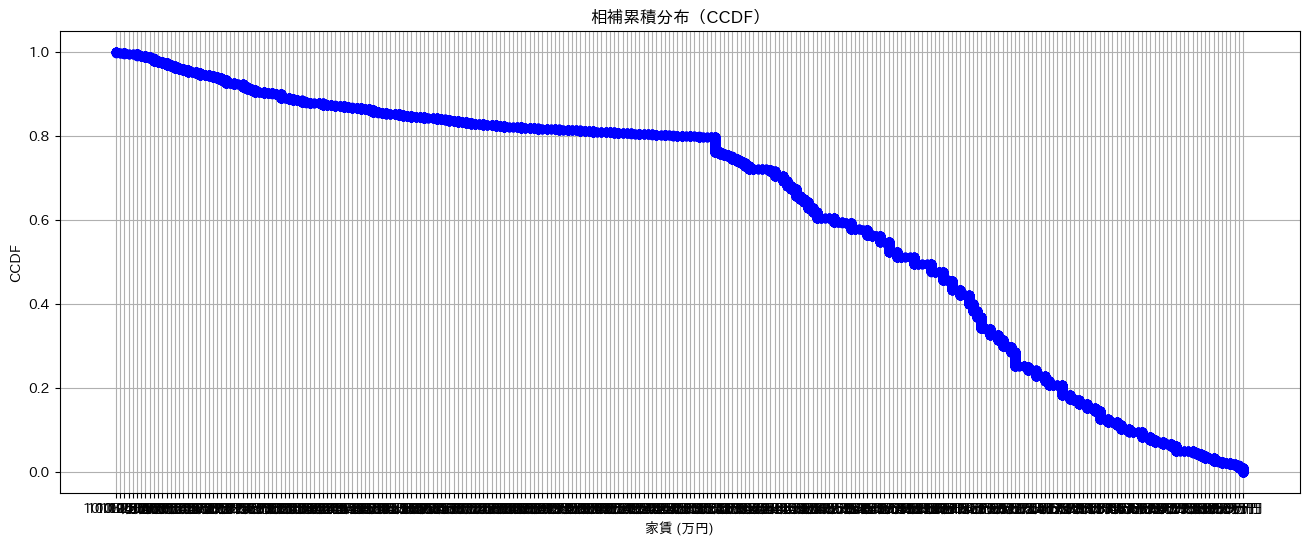

In [13]:

# 家賃のデータをソートして、相補累積分布関数（CCDF）を計算
sorted_rent = np.sort(tintai_df['家賃'])
ccdf = 1.0 - np.arange(1, len(sorted_rent) + 1) / len(sorted_rent)

# 相補累積分布をプロット
plt.figure(figsize=(16, 6))
plt.plot(sorted_rent, ccdf, marker='o', linestyle='-', color='blue')
plt.title('相補累積分布（CCDF）')
plt.xlabel('家賃 (万円)')
plt.ylabel('CCDF')
plt.grid(True)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [12]:
sorted_rent

array(['10.15万円', '10.15万円', '10.15万円', ..., '9万円', '9万円', '9万円'],
      dtype=object)